# Data Challenge 6

By: Maryanne Thangarajah

**Link to Github:**https://github.com/mthangarajah/Data_Challenge_6.git


In [1]:
from IPython.display import HTML
HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
$('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
} else {
$('div.input').show();
$('div .jp-CodeCell .jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Code on/off"></form>''')

## Abstract

Unsupervised methods such as K-means clustering and PCA were used to examine the AirBnB data from Victorica, Canada. Main features were selected in the dataset. Neighbhourhood groups were the focus of the analysis.Through k-means clustering, 16 main clusters were found that represent the data through the total within sum of squares. Boxplots were examined to see the impact of K-means clustering and compared to the boxplot from the original dataset. They were very similar, almost identical to one another. Lastly, principal component analysis (PCA) was conducted on the scaled data to examine dimension reduction with PCA. A scatterplot was created with PC2 and PC4, where the PC2 scores seem to have a higher score with respect to the neighbourhood data compared to PC4.

## Introduction

The data used in this analysis comes from the AirBnB website that is provided in a listings file. The dataset used is from Victoria, British Columbia, Canada AirBnB data. This dataset contains AirBnB listings from the Capital Regional District, which includes areas such as Victoria and Saanich. The focus of this analysis is to use unsupervised learning methods on the listings file through methods such as clustering and PCA analysis. The data used will focus on main features mentioned in the methods section. 

## Methods

The features examined in this analysis are focused on the main features in a listing. These main features in a listing are as follows: price, neighbourhood group, if it is instantly bookable, the number of reviews, how many it accommodates, the minimum number of nights, and the maximum number of nights. These seems to be a lot of features, but all of these are the more important features when looking to find an AirBnB.  The room type is also important, but almost all of the listings are for an entire apartments. Therefore, the room type is not included in the analysis. The focus will be on examining the k-means clustering and PCA analysis results on these data, specifically the neighbourhood group data.

The unsupervised methods used in this analysis are k-means clustering and PCA. Firstly, a new dataframe was created with the data listed above. In this dataframe, dummy variables were created for neighbourhood group and if the listing is instantly bookable. The prices were updated to type integer. Lastly, the data was scaled. The scaled data was used for both k-means clustering and PCA.

The data was scaled to test the interia to find the number of clusters needed. The number of clusters that were found in the plot were 16 (the elbow section of the plot). The cluster labels were added to the dataframe. A boxplot was created comparing both the clusters and the number of reviews. A secondary boxplot was created to examine the number of reviews by neighbourhood group to examine if there were any similarities.

Afterwards, PCA analysis was performed. Firstly, a plot of the variance explained and the cumulative variance explained by the principal components (PCs) was plotted (not shown). Though the second and fourth PC did not have a large cumulative variance, barplots were produced to examine the features, number of reviews and price that made up most of the variance. Multiple barplots of the PCA loadings were plots to find the the ones that had the number of reviews and price made up some of the component (higher weight). Barplots of the PCs 2 & 4 loading found that they had higher weights in these PCs. Lastly, PCA scores of PC 2 versus PC 4 was plotted by neighbourhood label. 

## Results

In [2]:
#Load the libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [128]:
#Load the data 
listing_victoria_gz = pd.read_csv("listingsv.csv.gz", compression='gzip')

In [5]:
#Create a new dataframe with the columns listed below
listing_information = listing_victoria_gz[["price","neighbourhood_group_cleansed","number_of_reviews", "instant_bookable", "accommodates", "minimum_nights", "maximum_nights"]]

# Drop all rows that have NA
listing_information = listing_information.dropna()

#Change the price column to remove the symbols and make the values integers
listing_information["price"] = listing_information ["price"].astype(str).str.replace("$", "").str[:-2].str.replace(".", "").str.replace(",","").astype(int)

#Create dummy variables for neighhourhood data and instant_bookable
listing_information= pd.get_dummies(listing_information, columns=["neighbourhood_group_cleansed","instant_bookable"])

In [6]:
# Create variable to assign standard scaler
scaler = StandardScaler()

#Fit the array 
scaler.fit(listing_information)

#Transform the fitted array so every variable has standard deviation of 1
# Assign to a variable
scaled_data = scaler.transform(listing_information)

In [7]:
# Create empty list called sum_of_squared to find the best number of clusters
sum_of_squares = []

# Initialize n to 1 for the while loop
n = 1

#This while loop goes through from 1 to 26 as there are 25 columns in the datafram
# It goes through each kmeans for each value of k and appends the inertia (sum of squares)
# into the list above
while n in range(1,26):
    
    #Create new variable listing for kmeans 
    listing = KMeans(n_clusters=n)
    
    #Fit the scaled data above using listing variable
    listing.fit(scaled_data)
    
    #Add the listing inertia to the list above
    sum_of_squares.append(listing.inertia_)
    
    #Add 1 to n 
    n = n + 1

### K-means Clustering

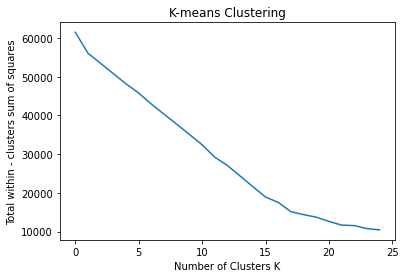

In [8]:
#Plot the sum_of_squares
plt.plot(sum_of_squares)

#Title of the plot
plt.title("K-means Clustering")

#The x-axis title
plt.xlabel('Number of Clusters K')

#The y-axis title
plt.ylabel('Total within - clusters sum of squares')

#Show the plot
plt.show()

**Figure 1:** This plot show the number of clusters by the total within clusters sum of squares. This plot was used to find the best number of clusters for the dataframe, which was chosen to be 16. 

In [9]:
# Create variable kmeans for k-means clustering with k=16
kmeans = KMeans(n_clusters = 16, random_state = 1)

#Fit the k-means above onto the array
kmeans.fit(scaled_data)

#Add the labels of clustering in the dataframe
listing_information['cluster'] = kmeans.labels_

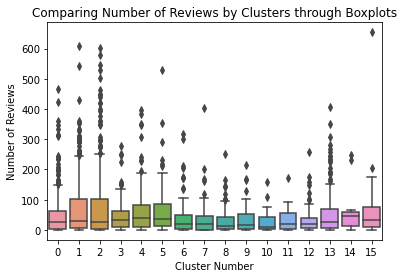

In [10]:
#Plot boxplots using the clusters and number of reviews
sns.boxplot(listing_information.cluster,listing_information.number_of_reviews)

#Title of the plot
plt.title("Comparing Number of Reviews by Clusters through Boxplots")

#The x-axis title
plt.xlabel('Cluster Number')

#The y-axis title
plt.ylabel('Number of Reviews')

#Show the plot
plt.show()

**Figure 2:** This boxplot shows the number of reviews by each cluster. This plot was used to examine the diferences in the cluster using the boxplot below.

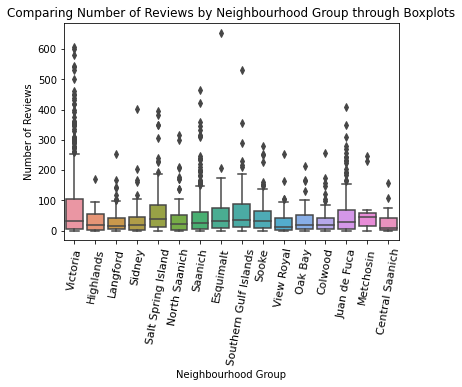

In [11]:
#Plot boxplots using the neighbour and number of reviews
sns.boxplot(listing_victoria_gz.neighbourhood_group_cleansed,listing_information.number_of_reviews)

#Title of the plot
plt.title("Comparing Number of Reviews by Neighbourhood Group through Boxplots")

#Rotate the x-axis variables and increase the font size for the x-axis
plt.xticks(rotation=80)
plt.xticks(fontsize=11)

#The x-axis title
plt.xlabel('Neighbourhood Group')

#The y-axis title
plt.ylabel('Number of Reviews')

#Show the plot
plt.show()

**Figure 3:** This boxplot shows the number of reviews by each neighbourhood. This plot was used to examine the diferences in the distribution of the number of reviews by neighbourhood compared to the cluster boxplot above.

In [29]:
#Create variable to perform PCA
pca = PCA()

#Fit and transform the scaled variables to PCA
pca_scores = pca.fit_transform(scaled_data)

In [92]:
#Number of components for x-axis
components = np.arange(1,24)

#Create a plot of the components on the x-axis and culumative sum of the variance on the y-axis 
# Assign the plot to a variable
x = plt.plot(components,np.cumsum(pca.explained_variance_ratio_))

# Title for x-axis
plt.xlabel("Number of Components")

# Title for y-axis
plt.ylabel("Culumative Explained Variance")

#Close the plot
plt.close()

In [30]:
#List of all the data used in the PCA analysis - Loadings plot
x = ['Price','Number of reviews','Accommodates','Minimum nights','Maximum nights','Neighbourhood-Central Saanich',
     'Neighbourhood-Colwood','Neighbourhood-Esquimalt','Neighbourhood-Highlands','Neighbourhood-Juan de Fuca',
     'Neighbourhood-Langford','Neighbourhood-Metchosin','Neighbourhood-North Saanich','Neighbourhood-Oak Bay',
     'Neighbourhood-Saanich','Neighbourhood-Salt Spring Island','Neighbourhood-Sidney','Neighbourhood-Sooke',
     'Neighbourhood-Southern Gulf Islands','Neighbourhood-Victoria','Neighbourhood-View Royal','Instant bookable-false',
     'Instant bookable-true']

#Variable pca loadings with the PCA components
pca_loadings = pca.components_

In [71]:
#Bar plot with Loadings PC 2
# Used to examine which variable was most explained in PC 2
plt.bar(x[:23], pca_loadings[1,:23])

#Position of the x-axis labels
x_position = np.arange(len(x))

#Location of the x-axis labels
plt.xticks(x_position, x);

#y-axis limit  
plt.ylim(-1,1);

#Rotate the x-axis labels
plt.xticks(rotation=80);

#Remove the plot
plt.close()

In [72]:
#Bar plot with Loadings PC 4
# Used to examine which variable was most explained in PC 4
plt.bar(x[:23], pca_loadings[3,:23])

#Position of the x-axis labels
x_position = np.arange(len(x))

#Location of the x-axis labels
plt.xticks(x_position, x)

#y-axis limit  
plt.ylim(-1,1)

#Rotate the x-axis labels
plt.xticks(rotation=80)

#Remove the plot
plt.close()

### PCA

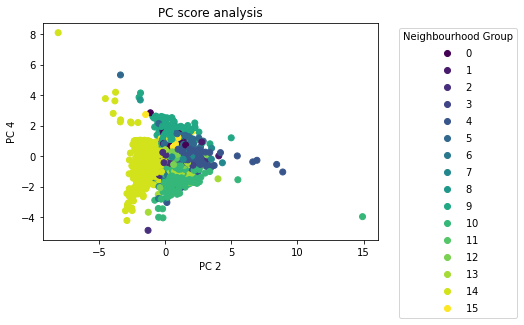

In [124]:
#Labels for the plot
LE = LabelEncoder()

#Color the plot by the neighbourhood group - fit and transform the variables
colors = LE.fit_transform(listing_victoria_gz["neighbourhood_group_cleansed"])

#Scatter plot for scores on the second versus the fourth with the labels
scatter_plot = plt.scatter(pca_scores[:,1], pca_scores[:,3], c = colors)

#List of all the neighbourhood's in the dataset
group_list = list(listing_victoria_gz["neighbourhood_group_cleansed"].unique())

#Add a legend to the plot with a title and change the position of the legend 
legend_information = plt.legend(*scatter_plot.legend_elements(num=len(group_list)), title="Neighbourhood Group",bbox_to_anchor=(1.05, 1),loc=2)

legend_information.text[1].set_text("")

# Title of the plot
plt.title("PC score analysis")

#The x-axis title
plt.xlabel('PC 2')

#The y-axis title
plt.ylabel('PC 4')

#Show the plot
plt.show()

**Figure 4:** This plot shows the PCA scores in PC 2 versus PC 4. The colors on the plot are the neighbourhood groups in the dataset. The neighbourhood names were not able to be produced in the legend. These PCs were chosen through examining barplots of the loadings of PC 2 and PC 4. 

## Discussion

This dataset with all the features mentioned in the methods section had about 25 different columns. Once the k-means clustering plot was plotted, the number of cluster that was used in this analysis was 16. The number of neighbour groups in this dataset is 16. Therefore, the clusters created may have been influenced by the neighbourhood groups. 

When comparing the two boxplot plots, these plots show that the neighbourhood group appears to be a major contributor for k-means clustering. Both of the plots are very similar to one another. It appears as though k-means analysis has clustered the data on the neighbourhood group category. Some of the boxplots do not align, which would make sense as k-means clustering is not always completely successful. However, the k-means clustering by the neighbourhood groups has shown to be pretty close to the original dataset as shown through the plots above.

For the PCA analysis, it is difficult to assess if the scores were able to discriminate between the different neighbourhoods. As mentioned in the methods section, PC 2 & PC 4 were chosen as they contained more weight with the number of reviews and price of the AirBnB. It appears as though the variables were better explained through the second principal component compared to the fourth principal component. The fourteenth group in the dataset on the plot shows that the second and fourth principal components have negative scores. Overall, PC scores for PC 2 may explain the differences in neighbourhood listings compared to PC scores for PC 4. Possibly, reducing the data to 2 or 4 dimensions is two low. The first five of PCs did not account for very high variances (about 0.35 of the culumative variance). Therefore, choosing a higher number of PC may show more defined results with a higher culumative variance.

Some of the limitations in this analysis were possibly the use of too many features. As mentioned above, I wanted to use the "main" features that are looked into when finding an AirBnB. However, having multiple features is an issue when deciding what features to focus on exclusively in the analysis. Secondly, possibly choosing another variable to focus on such as if a host is a superhost would have been more interesting.

For future analysis, having less features and more focused analysis would be helpful in understanding this dataset through unsupervised learning methods. Secondly, comparing the k-means clustering with PCA scores may be useful for the future to see how the two compare to one another. Lastly, examining the relationship between all the features in this dataset may be beneficial.

## Conclusion

This analysis focused on using unsupervised methods like k-means clustering and PCA on AirBnB data. The features selected in the analysis were seen as the main features in AirBnB data. Overall, neighbourhood groups impacted the number of clusters selected in K-means clustering. These clusters were very similar to the ones seen in the data through boxplots shown above. PCA showed the impact of principal component scores for PC 2 and PC 4. Principal component 2 seems to have higher scores for most neighbourhood groups. More analysis needs to be done to examine the different principal components in the dataset and the number of clusters through k-means clustering.